импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import sys
import os
from model import create_model
import tensorflow as tf

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
device = '/cpu:0'
#device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'
#print(device)

Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.many_to_many(
    window_size,
    num_features,
    downsample_step,
    target_window_size
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = create_model(X_train, y_train,device=device)

c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [4]:
model.compile(optimizer='adam', loss='Huber',metrics = ['MAPE'])
history = model.fit(X_train, y_train, epochs=200, batch_size=32,shuffle = True)


Epoch 1/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - MAPE: 98.3176 - loss: 253.9497
Epoch 2/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - MAPE: 92.8615 - loss: 241.7231
Epoch 3/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - MAPE: 88.0562 - loss: 233.8671
Epoch 4/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - MAPE: 83.2188 - loss: 224.5855
Epoch 5/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - MAPE: 78.5609 - loss: 215.5117
Epoch 6/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - MAPE: 74.0720 - loss: 206.0670
Epoch 7/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - MAPE: 70.2732 - loss: 198.0279
Epoch 8/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - MAPE: 66.7306 - loss: 189.3327
Epoch 9/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - MAPE: 63.7606 - loss: 182.6461
Epoch 10/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - MAPE: 60.4445 - loss: 171.7802
Epoch 11/200
451/451 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - MAPE: 58.3351 - loss: 166.0397
Epoch 12/200
451/451 ━━━━━━━━━

In [8]:
history.history.keys()

dict_keys(['MAPE', 'loss'])

In [10]:
import torch
losses =  {
    'train_main_loss': history.history['loss'],
    'train_mape': history.history['MAPE'],
    'train_tube':[0 for _ in range(len(history.history['MAPE']))],
    'test_mape': history.history['MAPE'],
    'test_tube': [0 for _ in range(len(history.history['MAPE']))]
    }

In [13]:
from model_history import ModelHistory
MH = ModelHistory(history.history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'TKAT')
# key = MH.add_result(
#         filename = BASE_DIR+'\\resualt/main.json',
#         model_name = 'Transformer',
#         result = 'best',
#         message = 'first',
#         params = {'input_dim': X_train.shape[2], # window_size*num_features - 1
#                   'hidden_dim': 128, # hidden_dim%num_heads == 0
#                   'output_dim': target_window_size,
#                   'num_heads': 8,
#                   'num_layers': 1,
#                   'lr':0.001,
#                   'batch_size':64}
#         )
# key

In [14]:
LV = LossVisualizer(losses)

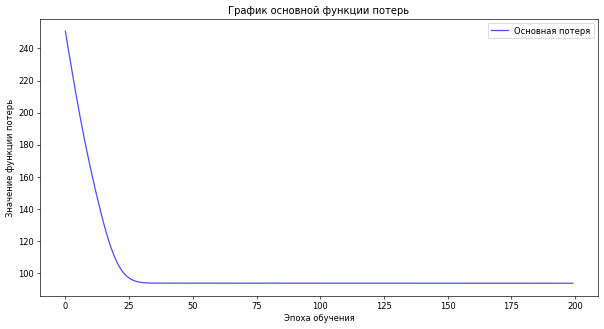

In [15]:
LV.show_training_loss()

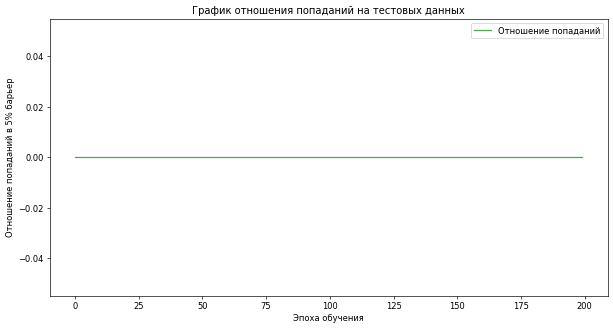

In [16]:
LV.show_test_tube()

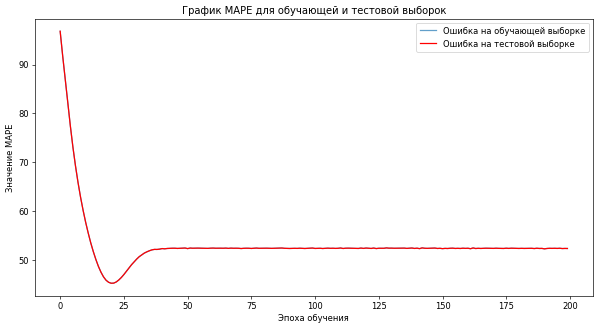

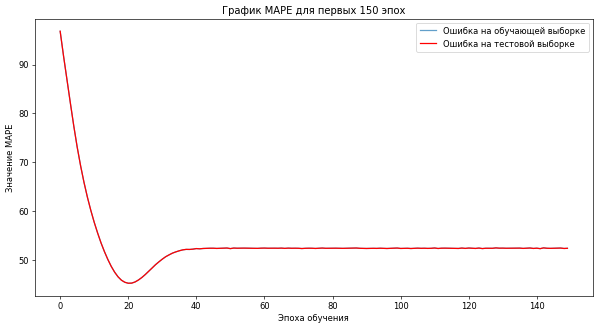

In [17]:
LV.show_mape()

In [18]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100,keras = True)

222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


ValueError: operands could not be broadcast together with shapes (7097,1) (7097,10,1) 

In [13]:
LV.show_predictions_rnn(model,df,pd_params,True)

Количество записей: 5334
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'to'